In [4]:
# 서울 CCTV 현황

import pandas as pd
cctv_seoul = pd.read_csv('CCTV_Seoul.csv', encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
cctv_seoul.columns
cctv_seoul.columns[0]
df=cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)

In [10]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [14]:
pop_seoul=pd.read_excel("population_Seoul.xls",encoding='utf-8')
pop_seoul.head()
pop_seoul=pd.read_excel("population_Seoul.xls",encoding='utf-8', header=2, usecols="B,D,G,J,N")
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별', pop_seoul.columns[1]:'총인구수', pop_seoul.columns[2]:'한국인수', pop_seoul.columns[3]:'외국인수', pop_seoul.columns[4]:'고령자수'}, inplace=True)
pop_seoul.head()

,구별,총인구수,한국인수,외국인수,고령자수
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [59]:
'''
pop_seoul.info()
pop_seoul.columns
pop_seoul.describe()
'''
pop_seoul['구별'].unique()
pop_seoul['구별'].isnull()
pop_seoul[pop_seoul['구별'].isnull()]
#pop_seoul.drop([26], inplace=True)
#pop_seoul.drop([0],inplace=True)
pop_seoul.head()
pop_seoul['외국인비율']=pop_seoul['외국인수']/pop_seoul['총인구수']*100
pop_seoul['고령자비율']=pop_seoul['고령자수']/pop_seoul['총인구수']*100
#pop_seoul.sort_values(by='총인구수', ascending=False)
#pop_seoul.sort_values(by='외국인수', ascending=False)
#pop_seoul.sort_values(by='고령자비율', ascending=False)
#pop_seoul.sort_values(by='외국인비율', ascending=False)

pop_seoul.head()
cctv_seoul.head()
merging_data=pd.merge(cctv_seoul, pop_seoul, on='구별')
merging_data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,총인구수,한국인수,외국인수,고령자수,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [65]:
cctv_seoul.head()
cctv_seoul['최근 증가율']=(cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.sort_values(by='최근 증가율', ascending=False)
merging_data=pd.merge(cctv_seoul, pop_seoul, on='구별')
merging_data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,총인구수,한국인수,외국인수,고령자수,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [69]:
del merging_data['2013년도 이전']
del merging_data['2014년']
del merging_data['2015년']
del merging_data['2016년']

KeyError: '2013년도 이전'

In [79]:
import numpy as np
#merging_data.set_index('구별',inplace=True)
merging_data.reset_index()
#merging_data.head()

#상관계수 -> corrcoef
#음의 방향, 양의 방향
np.corrcoef(merging_data['고령자비율'],merging_data['소계'])
np.corrcoef(merging_data['외국인비율'],merging_data['소계'])
np.corrcoef(merging_data['총인구수'],merging_data['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

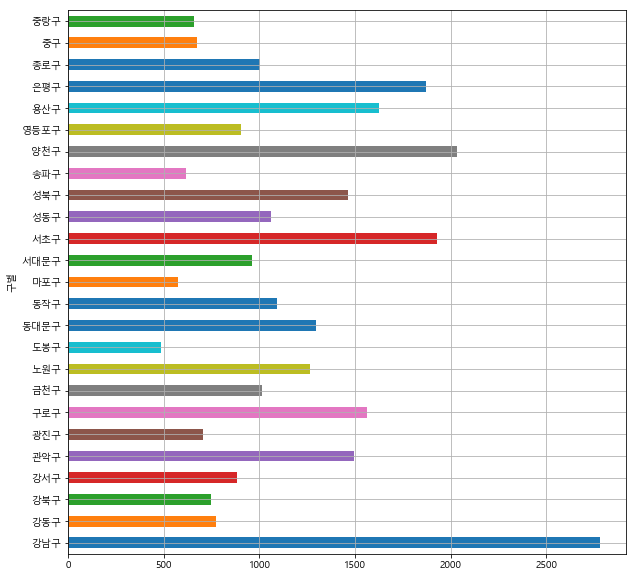

In [86]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name() 
rc('font',family=font_name)
import matplotlib.pyplot as plt
merging_data['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

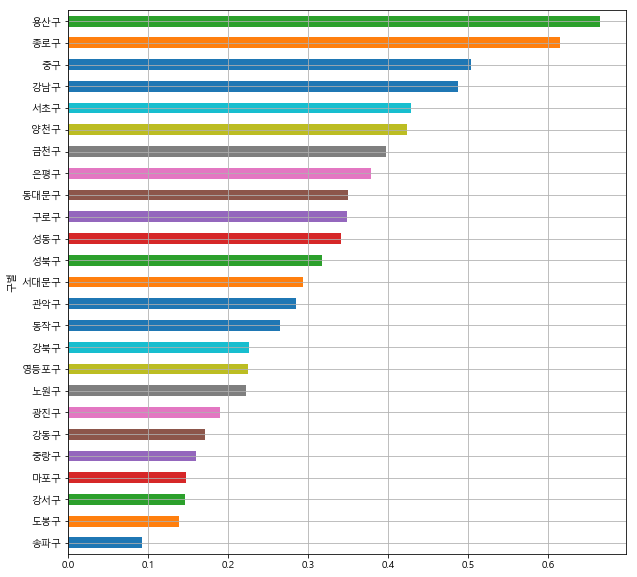

In [91]:
#merging_data['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#plt.show()
merging_data['CCTV 비율']=merging_data['소계']/merging_data['총인구수']*100
#merging_data
merging_data['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

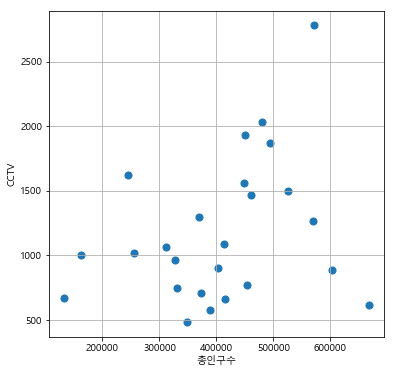

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(merging_data['총인구수'],merging_data['소계'],s=50,)
plt.xlabel('총인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()